In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['font.size'] = 15

In [2]:
def get_vacuum(fname):
    try:
        f = open(fname,"r")
    except:
        raise FileNotFoundError(fname)
    line = f.readline()
    while line != '':
        if 'vacuum' in line:
            vacuum = float(line.split()[-2])
            return vacuum
        else:
            line = f.readline()
def get_eqp_homo_lumo_gap(fname):
    try:
        f = open(fname,"r")
    except:
        raise FileNotFoundError(fname)  
    f.readline();
    f.readline();
    line = f.readline()
    homo = float(line.split()[5])
    line = f.readline()
    lumo = float(line.split()[5])
    return homo,lumo,lumo-homo
def model_func(x,a,b):
    return a+b/x

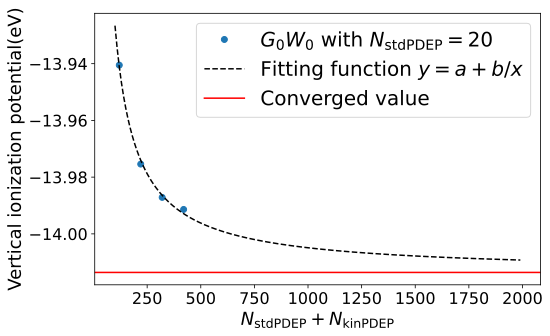

In [4]:
for m in ['CH4']:
    x = []
    y = []
    vacuum = get_vacuum("./G2_97/%s-PBE/pw/%s.out"%(m,m.lower()))
    prefix = "./G2_97/%s-PBE/wfreq"%m
    for i in range(100,401,100):
        fname = prefix+"/kin-20/kin-20-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        x.append(20+i)
        y.append(homo-vacuum)
    p,q = curve_fit(model_func,x,y)
#     print(p[0],p[1])
    xx = np.arange(100,2000,10)
    
    x = np.array(x)
    y = np.array(y)
    
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    plt.plot(x,y,'o',c='C0',label=r'$G_0W_0$ with $N_\mathrm{stdPDEP}=20$')
    plt.plot(xx,model_func(xx,*p),'--k',label=r'Fitting function $y = a+b/x$')
    ax.axhline(y=p[0],c='r',label='Converged value')
    plt.legend(fontsize=20)
    plt.xlabel(r'$N_\mathrm{stdPDEP}+N_\mathrm{kinPDEP}$',fontsize=18)
    plt.ylabel('Vertical ionization potential(eV)',fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
#     print(vacuum)
#     fig.savefig('fig/Fitting_example_of_CH4_from120.eps',bbox_inches='tight') 
#     fig.savefig('fig/Fitting_example_of_CH4_from120.png',bbox_inches='tight',dpi=200)
    